In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
# Reading in 2 .csv file data into 2 different dataframes

df4 = pd.read_csv('Part2 + Data2.csv')
df5 = pd.read_csv('Part2 - Data1.csv')

Data Analysis - EDA & Cleanup Wherever Required

In [ ]:
df4.shape

(5000, 7)

In [ ]:
df5.shape

(5000, 8)

In [ ]:
df4.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [ ]:
df5.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [ ]:
df4.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [ ]:
df5.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [ ]:
print(df4.to_string())

        ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  LoanOnCard
0        1         0         1                    0                0           0         NaN
1        2         0         1                    0                0           0         NaN
2        3         0         0                    0                0           0         NaN
3        4         0         0                    0                0           0         NaN
4        5         0         0                    0                0           1         NaN
5        6       155         0                    0                1           0         NaN
6        7         0         0                    0                1           0         NaN
7        8         0         0                    0                0           1         NaN
8        9       104         0                    0                1           0         NaN
9       10         0         0                    0                0  

In [ ]:
print(df5.to_string())

        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  MonthlyAverageSpend  Level
0        1   25              1            49    91107            4                 1.60      1
1        2   45             19            34    90089            3                 1.50      1
2        3   39             15            11    94720            1                 1.00      1
3        4   35              9           100    94112            1                 2.70      2
4        5   35              8            45    91330            4                 1.00      2
5        6   37             13            29    92121            4                 0.40      2
6        7   53             27            72    91711            2                 1.50      2
7        8   50             24            22    93943            1                 0.30      3
8        9   35             10            81    90089            3                 0.60      2
9       10   34              9           180    93

In [ ]:
# Merging both the datasets

df6 = pd.merge(df5,df4,how='outer',on='ID')

In [ ]:
df6.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [ ]:
df6.shape

(5000, 14)

In [ ]:
df6.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [ ]:
df6[['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']] = df6[['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']].astype(object)

In [ ]:
df6.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [ ]:
print(df6.to_string())

        ID  Age  CustomerSince  HighestSpend  ZipCode HiddenScore  MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount InternetBanking CreditCard  LoanOnCard
0        1   25              1            49    91107           4                 1.60     1         0        1                   0               0          0         NaN
1        2   45             19            34    90089           3                 1.50     1         0        1                   0               0          0         NaN
2        3   39             15            11    94720           1                 1.00     1         0        0                   0               0          0         NaN
3        4   35              9           100    94112           1                 2.70     2         0        0                   0               0          0         NaN
4        5   35              8            45    91330           4                 1.00     2         0        0                   0              

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

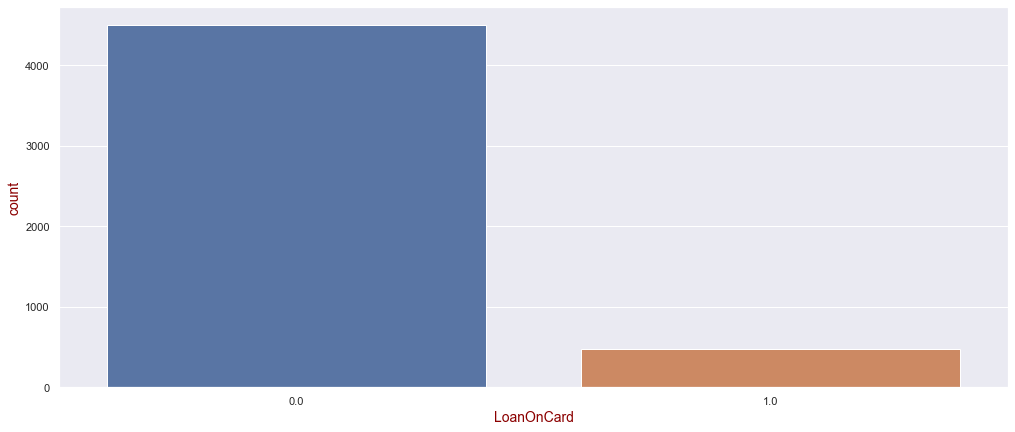

In [ ]:
# Distribution of LoanOnCard column through a Count Plot

sns.set(style="darkgrid")
plt.figure(figsize=(17,7))

font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

plt.xlabel('LoanOnCard', fontdict = font)
plt.ylabel('Frequency',fontdict = font)
sns.countplot(df6['LoanOnCard'])


In [ ]:
# 'LoanOnCard' Target Column Value counts

(df6['LoanOnCard'].value_counts()/df6['LoanOnCard'].count())*100

0.0    90.361446
1.0     9.638554
Name: LoanOnCard, dtype: float64

In [ ]:
# Finding the unique values to impute if required
df6['LoanOnCard'].unique()

array([nan,  1.,  0.])

In [ ]:
# Finding number of total Null/NaN values to be imputed
df6['LoanOnCard'].isna().sum()

20

In [ ]:
# Percentage of Null Values in the LoanOnCard Column
print ('Percentage of Null values in the LoanOnCard column is = ',(df6['LoanOnCard'].isna().sum()/df6['LoanOnCard'].count())*100)

Percentage of Null values in the LoanOnCard column is =  0.4016064257028112


In [ ]:
# Finding the Mode value in the 'LoanOnCard' column to perform an imputaion for the Null values
df6['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [ ]:
# Replacing all Null values in LoanOnCard with the Mode value - 0
df6['LoanOnCard'] = df6['LoanOnCard'].fillna(0)

In [ ]:
print(df6.to_string())

        ID  Age  CustomerSince  HighestSpend  ZipCode HiddenScore  MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount InternetBanking CreditCard  LoanOnCard
0        1   25              1            49    91107           4                 1.60     1         0        1                   0               0          0         0.0
1        2   45             19            34    90089           3                 1.50     1         0        1                   0               0          0         0.0
2        3   39             15            11    94720           1                 1.00     1         0        0                   0               0          0         0.0
3        4   35              9           100    94112           1                 2.70     2         0        0                   0               0          0         0.0
4        5   35              8            45    91330           4                 1.00     2         0        0                   0              

In [ ]:
# Converting the Column type to int64
df6[['LoanOnCard']] = df6[['LoanOnCard']].astype('int64')
df6.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard               int64
dtype: object

In [ ]:
print(df6.to_string())

        ID  Age  CustomerSince  HighestSpend  ZipCode HiddenScore  MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount InternetBanking CreditCard  LoanOnCard
0        1   25              1            49    91107           4                 1.60     1         0        1                   0               0          0           0
1        2   45             19            34    90089           3                 1.50     1         0        1                   0               0          0           0
2        3   39             15            11    94720           1                 1.00     1         0        0                   0               0          0           0
3        4   35              9           100    94112           1                 2.70     2         0        0                   0               0          0           0
4        5   35              8            45    91330           4                 1.00     2         0        0                   0              

In [ ]:
# Checking for unexpected/invalid values in all categorical variables
for column in df6[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']]:
    print(df6[column].unique())

[0 1]
[0 1]
[0 1]
[1 0]
[1 2 3]
[4 3 1 2]


In [ ]:
# Removing columns not required for prediction
df7 = df6.drop(['ID','ZipCode'], axis = 1)

In [ ]:
# X & y Slit of Dataset Columns before Model Training

# independant variables split into X
X = df7.drop(['LoanOnCard'], axis=1)

# the dependent variable split into X
Y = df7[['LoanOnCard']]

X.head()

Age  CustomerSince  HighestSpend HiddenScore  MonthlyAverageSpend Level  \
0   25              1            49           4                  1.6     1   
1   45             19            34           3                  1.5     1   
2   39             15            11           1                  1.0     1   
3   35              9           100           1                  2.7     2   
4   35              8            45           4                  1.0     2   

   Mortgage Security FixedDepositAccount InternetBanking CreditCard  
0         0        1                   0               0          0  
1         0        1                   0               0          0  
2         0        0                   0               0          0  
3         0        0                   0               0          0  
4         0        0                   0               0          1

In [ ]:
df7.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard               int64
dtype: object

In [ ]:
df7

Age  CustomerSince  HighestSpend HiddenScore  MonthlyAverageSpend Level  \
0      25              1            49           4                  1.6     1   
1      45             19            34           3                  1.5     1   
2      39             15            11           1                  1.0     1   
3      35              9           100           1                  2.7     2   
4      35              8            45           4                  1.0     2   
...   ...            ...           ...         ...                  ...   ...   
4995   29              3            40           1                  1.9     3   
4996   30              4            15           4                  0.4     1   
4997   63             39            24           2                  0.3     3   
4998   65             40            49           3                  0.5     2   
4999   28              4            83           3                  0.8     1   

      Mortgage Security FixedDepositAccount InternetBanking CreditCard  \
0            0        1                   0               0          0   
1            0        1                   0               0          0   
2            0        0                   0               0          0   
3            0        0                   0               0          0   
4            0        0                   0               0          1   
...        ...      ...                 ...             ...        ...   
4995         0        0                   0               1          0   
4996        85        0                   0               1          0   
4997         0        0                   0               0          0   
4998         0        0                   0               1          0   
4999         0        0                   0               1          1   

      LoanOnCard  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           0  

[5000 rows x 12 columns]

In [ ]:
# Train-Test Split

# Split X and Y into training and test set in 75:25 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [ ]:
# Logistic Regression Base Model Build, Training & Prediction

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model_base = LogisticRegression()
model_base.fit(X_train, Y_train)
#predict on test
Y_predict = model_base.predict(X_test)

# Model coefficients
coef_df7 = pd.DataFrame(model_base.coef_)
coef_df7['intercept'] = model_base.intercept_
coef_df7

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0         1        2         3        4         5         6  \
0 -0.45153  0.466014  0.04708  0.531999  0.04981  1.452237  0.000669   

          7         8         9        10  intercept  
0  0.107584  2.351037 -0.414526 -0.686494  -0.353288

In [ ]:
# Print Logistic Regression Base Model Accuracy

model_score = model_base.score(X_test, Y_test)
print("Accuracy of Logistic Regression Base Model without a Balanced Dataset/Hyperparameter Tuning =", model_score)

Accuracy of Logistic Regression Base Model without a Balanced Dataset/Hyperparameter Tuning = 0.948


<AxesSubplot:>

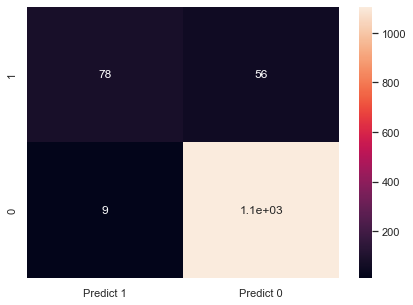

In [ ]:
# Confusion Matrix for Testing Data Predictions

cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])

df7_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df7_cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1116
           1       0.90      0.58      0.71       134

    accuracy                           0.95      1250
   macro avg       0.92      0.79      0.84      1250
weighted avg       0.95      0.95      0.94      1250



In [ ]:
df6['LoanOnCard'].value_counts()

0    4520
1     480
Name: LoanOnCard, dtype: int64

In [ ]:
# Balancing Dataset based on the target variable value counts - Upsampling Minority Class Dataset

from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df7_majority = df7[(df7['LoanOnCard']==0)] 
df7_minority = df7[(df7['LoanOnCard']==1)] 
# upsample minority class
df7_minority_upsampled = resample(df7_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4520 , # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df7_upsampled = pd.concat([df7_majority,df7_minority_upsampled])

In [ ]:
print(df7_upsampled.to_string())

      Age  CustomerSince  HighestSpend HiddenScore  MonthlyAverageSpend Level  Mortgage Security FixedDepositAccount InternetBanking CreditCard  LoanOnCard
0      25              1            49           4                 1.60     1         0        1                   0               0          0           0
1      45             19            34           3                 1.50     1         0        1                   0               0          0           0
2      39             15            11           1                 1.00     1         0        0                   0               0          0           0
3      35              9           100           1                 2.70     2         0        0                   0               0          0           0
4      35              8            45           4                 1.00     2         0        0                   0               0          1           0
5      37             13            29           4              

In [ ]:
# Value counts for Upsampled Dataset

df7_upsampled['LoanOnCard'].value_counts() 

0    4520
1    4520
Name: LoanOnCard, dtype: int64

In [ ]:

# independant variables split into X_unsampled
X_upsampled = df7_upsampled.drop(['LoanOnCard'], axis=1)

# the dependent variable split into Y_unsampled
Y_upsampled = df7_upsampled[['LoanOnCard']]

X_upsampled.head()

Age  CustomerSince  HighestSpend HiddenScore  MonthlyAverageSpend Level  \
0   25              1            49           4                  1.6     1   
1   45             19            34           3                  1.5     1   
2   39             15            11           1                  1.0     1   
3   35              9           100           1                  2.7     2   
4   35              8            45           4                  1.0     2   

   Mortgage Security FixedDepositAccount InternetBanking CreditCard  
0         0        1                   0               0          0  
1         0        1                   0               0          0  
2         0        0                   0               0          0  
3         0        0                   0               0          0  
4         0        0                   0               0          1

In [ ]:

# Split X and Y into training and test set in 75:25 ratio

X_upsampled_train, X_upsampled_test, Y_upsampled_train, Y_upsampled_test = train_test_split(X_upsampled, Y_upsampled, test_size=0.25, random_state=42)

In [ ]:
# Logistic Regression Model Fit on Balanced Train Data

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model_base_balanced = LogisticRegression() # solver="liblinear"
model_base_balanced.fit(X_upsampled_train, Y_upsampled_train)
#predict on test
Y_upsampled_predict = model_base_balanced.predict(X_upsampled_test)

# Model coefficients
coef_df7_upsampled = pd.DataFrame(model_base_balanced.coef_)
coef_df7_upsampled['intercept'] = model_base_balanced.intercept_
coef_df7_upsampled

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0         1         2         3         4         5         6  \
0 -0.430765  0.431351  0.055096  0.609102  0.267741  1.505771 -0.000006   

          7         8         9        10  intercept  
0  0.091654  2.554323 -0.308738 -0.424044  -0.325162

In [ ]:
# Accuracy of Logistic Regress model Fit on Balanced Train Data

model_score = model_base_balanced.score(X_upsampled_test, Y_upsampled_test)
print("Accuracy of Logistic Regression Base Model with balanced dataset but without Hyperparameter Tuning =", model_score)

Accuracy of Logistic Regression Base Model with balanced dataset but without Hyperparameter Tuning = 0.8907079646017699


<AxesSubplot:>

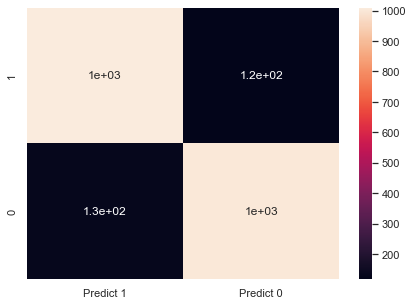

In [ ]:
# Confusion Matrix for Upsampled Testing Data Predictions

upsampled_cm=metrics.confusion_matrix(Y_upsampled_test, Y_upsampled_predict, labels=[1, 0])

df7_upsampled_cm = pd.DataFrame(upsampled_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df7_upsampled_cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_upsampled_test,Y_upsampled_predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1133
           1       0.89      0.90      0.89      1127

    accuracy                           0.89      2260
   macro avg       0.89      0.89      0.89      2260
weighted avg       0.89      0.89      0.89      2260



In [ ]:
# convert all attribute values to fit into a Z scale

from sklearn.preprocessing import scale
XScaled = scale(X)

In [ ]:
# Split X and Y into training and test set in 75:25 ratio

Xs_train, Xs_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.25, random_state=42)

In [ ]:
# KNN Base Model

NNH_base = KNeighborsClassifier()

# Call Nearest Neighbour algorithm
NNH_base.fit(Xs_train, Y_train)
Y_predict_test = NNH_base.predict(Xs_test)
print("Accuracy of KNN Base Model without Hyperparameter Tuning =", NNH_base.score(Xs_test, Y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of KNN Base Model without Hyperparameter Tuning = 0.956


In [ ]:
# SVM Base Model

from sklearn.svm import SVC
svc_base = SVC()
svc_base.fit(Xs_train, Y_train)

Y_predict_test = svc_base.predict(Xs_test)
print("Accuracy of SVM Base Model without Hyperparameter Tuning =", svc_base.score(Xs_test, Y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of SVM Base Model without Hyperparameter Tuning = 0.9744


In [ ]:
# Hyperparameter Tuning for KNN Model using Grid SearchCV

from sklearn.model_selection import GridSearchCV

neighbors = range(1,31)
grid_params = { 'n_neighbors' : neighbors,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the Grid Search model for KNN model on our train set
g_res = gs.fit(Xs_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# find the best score for our KNN model after Hyperparameter tuning
print("Best cross-validated mean accuracy of KNN model with Hyperparameter Tuning done = ", g_res.best_score_)

Best cross-validated mean accuracy of KNN model with Hyperparameter Tuning done =  0.9573333333333333


In [ ]:
# get the hyperparameters with the above best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
# Testing out Hyperparameter tuned KNN model on the Test Data

print("Accuracy for the Test Data with Hyperparameter Tuned KNN Model =", g_res.score(Xs_test, Y_test))

Accuracy for the Test Data with Hyperparameter Tuned KNN Model = 0.9608


In [ ]:
# Hyperparameter Tuning for SVM Model

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
best_grid = grid.fit(Xs_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.6s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.928 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.931 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.909 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.911 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.909 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.908 total time=   0.1s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.907 total time=   0.1s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.956 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.907 total time=   0.1s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.955 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.927 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.924 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.923 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.923 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.921 total time=   0.9s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.948 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.1s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.948 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.951 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.960 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.949 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.955 total time=   0.1s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.951 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.948 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.916 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.916 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.920 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.915 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.913 total time=   0.1s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.955 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.948 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.908 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.907 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.957 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.932 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.929 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.933 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.957 total time=   0.2s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.957 total time=   0.2s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.967 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.979 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.971 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.961 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.957 total time=   0.2s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.945 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.947 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.948 total time=   0.1s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.951 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.955 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.948 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.957 total time=   0.2s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.916 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.916 total time=   0.1s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.920 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.919 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.913 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.953 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.951 total time=   1.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.948 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.957 total time=   1.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.932 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.932 total time=   0.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.953 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.951 total time=   1.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.948 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.957 total time=   1.3s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.979 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.953 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.951 total time=   1.2s
[CV 4/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.948 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.957 total time=   1.2s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.984 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.976 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.971 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.953 total time=   1.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.951 total time=   1.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .C=100, gamma=0.001, kernel=linear;, score=0.948 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=100, gamma=0.001, kernel=linear;, score=0.957 total time=   1.2s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.957 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.1s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.961 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.953 total time=   0.1s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.969 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.951 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=100, gamma=0.0001, kernel=linear;, score=0.953 total time=   1.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.951 total time=   1.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=0.948 total time=   1.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=0.957 total time=   1.2s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.945 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.952 total time=   0.1s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.945 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.945 total time=   0.1s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.949 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.951 total time=  12.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.953 total time=  12.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.951 total time=   9.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.948 total time=  11.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.957 total time=  12.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.932 total time=   0.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.932 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.928 total time=   0.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.951 total time=  12.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.953 total time=  12.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.951 total time=   9.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.948 total time=  11.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.957 total time=  11.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.972 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.951 total time=  12.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.953 total time=  12.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.951 total time=   9.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.948 total time=  11.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.957 total time=  11.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.983 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.975 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.975 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.951 total time=  12.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.953 total time=  12.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.951 total time=   9.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.948 total time=  12.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.957 total time=  12.6s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.972 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.975 total time=   0.1s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.968 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.963 total time=   0.1s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.979 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.951 total time=  12.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.953 total time=  12.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.951 total time=   9.7s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.948 total time=  11.9s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.957 total time=  12.3s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.951 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.1s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.952 total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.948 total time=   0.1s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.957 total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# print best parameter after Hyperparameter tuning
print(best_grid.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
# find the best score for our SVM model after Hyperparameter tuning
print("Best cross-validated mean accuracy of SVM model with Hyperparameter Tuning done = ", best_grid.best_score_)

Best cross-validated mean accuracy of SVM model with Hyperparameter Tuning done =  0.9784


In [ ]:
# Testing out Hyperparameter tuned SVM model on the Test Data

print("Accuracy for the Test Data with Hyperparameter Tuned SVM Model =", best_grid.score(Xs_test, Y_test))

Accuracy for the Test Data with Hyperparameter Tuned SVM Model = 0.9864


In [ ]:
# Hyperparameter Tuning for Logistic Regression Model

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(Xs_train,Y_train)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.90773333 ...        nan 0.95226667 0.95226667]
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# find the best score for our Logistic Regression model after Hyperparameter tuning
print("Best cross-validated mean accuracy of Logistic Regression model with Hyperparameter Tuning done = ", best_clf.best_score_)

Best cross-validated mean accuracy of Logistic Regression model with Hyperparameter Tuning done =  0.9528


In [ ]:
# print best parameter after Hyperparameter tuning
print(best_clf.best_params_)

{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Testing out Hyperparameter tuned Logistic Regression model on the Test Data

print("Accuracy for the Test Data with Hyperparameter Tuned Logistic Regression Model =",best_clf.score(Xs_test,Y_test))

Accuracy for the Test Data with Hyperparameter Tuned Logistic Regression Model = 0.9512


In [ ]:
# FINAL BEST MODEL EVALUATION METRICS - SVM MODEL


# Target prediction for Testing Data using our Hyperparameter tuned SVM model
Y_predict_test = best_grid.predict(Xs_test)

# Target prediction for Training Data using our Hyperparameter tuned SVM model
Y_predict_train = best_grid.predict(Xs_train)

<AxesSubplot:>

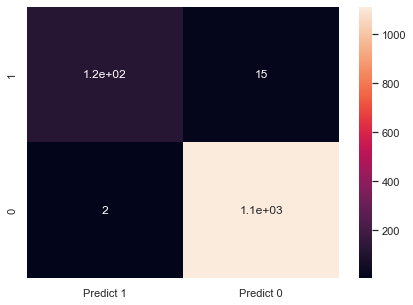

In [ ]:
# Confusion Matrix for Testing Data Predictions for our Hyperparameter tuned SVM model

svm_hyper_cm=metrics.confusion_matrix(Y_test, Y_predict_test, labels=[1, 0])

df_svm_hyper_cm = pd.DataFrame(svm_hyper_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_svm_hyper_cm, annot=True)

In [ ]:
# Classification Report of Performance metrics for Hyperparameter tuned SVM model on Testing data
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1116
           1       0.98      0.89      0.93       134

    accuracy                           0.99      1250
   macro avg       0.99      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



In [ ]:
# Classification Report of Performance metrics for Hyperparameter tuned SVM model on Training data
print(classification_report(Y_train,Y_predict_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3404
           1       0.98      0.91      0.95       346

    accuracy                           0.99      3750
   macro avg       0.99      0.95      0.97      3750
weighted avg       0.99      0.99      0.99      3750



<AxesSubplot:>

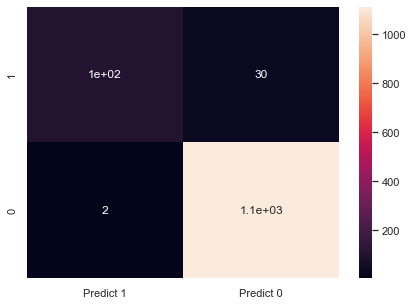

In [ ]:
# BASE MODEL EVALUATION METRICS

Y_predict_test = svc_base.predict(Xs_test)
Y_predict_train = svc_base.predict(Xs_train)

# Confusion Matrix for Testing Data Predictions for our Hyperparameter tuned SVM model

svm_base_cm=metrics.confusion_matrix(Y_test, Y_predict_test, labels=[1, 0])

df_svm_base_cm = pd.DataFrame(svm_base_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_svm_base_cm, annot=True)

In [ ]:
# Classification Report of Performance metrics for Base SVM model on Testing data
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1116
           1       0.98      0.78      0.87       134

    accuracy                           0.97      1250
   macro avg       0.98      0.89      0.93      1250
weighted avg       0.97      0.97      0.97      1250



In [ ]:
# Classification Report of Performance metrics for Base SVM model on Training data
print(classification_report(Y_train,Y_predict_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3404
           1       0.99      0.79      0.87       346

    accuracy                           0.98      3750
   macro avg       0.98      0.89      0.93      3750
weighted avg       0.98      0.98      0.98      3750

